In [72]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_features=2, random_state=42, cluster_std=2, n_samples=100)

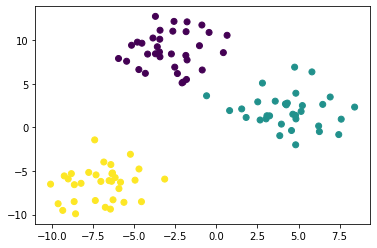

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, 1], c=y);

In [74]:
from numpy import linalg as LA
from numpy import argmin
import random

def k_means(X, k):
    clusters = [[] for i in range(k)]
    centers = []
    
    while len(centers) != k:
        center = random.choice(X)
        # if center not in centers:
        centers.append(center)
    
    while True:
        current_cluster = [[] for i in range(k)]
        
        for i in range(len(X)):
            dist = []
            for c in centers:
                dist.append(abs(LA.norm(X[i] - c)))
                
            current_cluster[argmin(dist)].append(i)
            
        if clusters == current_cluster:
            break
            
        clusters = current_cluster
            
        centers = []
        for cluster in clusters:
            summ = 0
            for elem in cluster:
                summ += X[elem]
            centers.append(summ / len(X))
            
    return clusters


In [75]:
cluster_ans = k_means(X, 3)

In [76]:
ans_x, ans_y = [], []

for coords in cluster_ans:
    arr_x, arr_y = [], []
    for elem in coords:
        arr_x.append(X[elem][0])
        arr_y.append(X[elem][1])
    
    ans_x.append(arr_x)
    ans_y.append(arr_y)

for i in range(len(ans_x)):
    print(len(ans_x[i]), len(ans_y[i]))

38 38
33 33
29 29


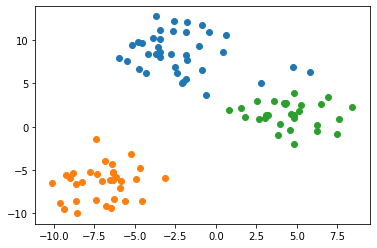

In [77]:
for i in range(len(ans_x)):
    plt.scatter(ans_x[i], ans_y[i])